In [1]:
####### dropout resnet18 vs without dropout
#### 
import torch
import sys
sys.path.append("..")
import numpy as np

CLEAN_PATH = "/home/yifan/dataset/resnet18_with_dropout/pairflip/cifar10/0/"
REF_PATH = "/home/yifan/dataset/clean/pairflip/cifar10/0"


ENCODER_DIMS=[512,256,256,256,256,2]
DECODER_DIMS= [2,256,256,256,256,512]
VIS_MODEL_NAME = 'vis'

DEVICE='cuda:0'
########## initulize reference data and target data
from alignment.data_preprocess import DataInit
REF_EPOCH = 200
TAR_EPOCH = 200
ref_datainit = DataInit(REF_PATH,REF_PATH,REF_EPOCH)
tar_datainit = DataInit(CLEAN_PATH,CLEAN_PATH,TAR_EPOCH)
ref_model, ref_provider, ref_train_data, ref_prediction, ref_prediction_res, ref_scores = ref_datainit.getData()
tar_model, tar_provider, tar_train_data, tar_prediction, tar_prediction_res, tar_scores = tar_datainit.getData()


from alignment.ReferenceGenerator import ReferenceGenerator
gen = ReferenceGenerator(ref_provider=ref_provider, tar_provider=tar_provider,REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH,ref_model=ref_model,tar_model=tar_model,DEVICE=DEVICE)

absolute_alignment_indicates,predict_label_diff_indicates,predict_confidence_Diff_indicates,high_distance_indicates = gen.subsetClassify(mes_val_for_diff=18,mes_val_for_same=0.8,conf_val_for_diff=0.3,conf_val_for_same=0.05)


from representationTrans.trans_visualizer_border import visualizer
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

I = np.eye(512)
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
vis = visualizer(ref_provider, I,I, np.dot(ref_provider.train_representation(TAR_EPOCH),I), projector, 200,[0,1],'tab10')


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 411.51it/s]


NET resnet18_with_dropout
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 7384.86it/s]


absolute alignment indicates number: 106 label diff indicates number: 12 confidence diff indicates number: 16 high distance number: 97


In [6]:
from AlignVis.aproximate_ref_generator import ApproximateRefGenerator
aeg = ApproximateRefGenerator(ref_provider=ref_provider, tar_provider=tar_provider, REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH, tar_model=tar_model, ref_model=ref_model,DEVICE=DEVICE)

100%|██████████| 250/250 [00:00<00:00, 6781.50it/s]


In [ ]:
newRep = aeg.generate_representation_by_cka(predict_label_diff_indicates)

In [8]:
from CKA_utils.CKA import CKA, CudaCKA
np_cka = CKA()

print('CKA between absolute alignmnet subset is:',np_cka.kernel_CKA(newRep,tar_train_data[predict_label_diff_indicates]))

CKA between absolute alignmnet subset is: 0.9999999284362047


In [5]:
from CKA_utils.CKA import CKA, CudaCKA
np_cka = CKA()

print('CKA between absolute alignmnet subset is:',np_cka.kernel_CKA(newRep,ref_train_data[predict_label_diff_indicates]))

CKA between absolute alignmnet subset is: 0.8016675703145227


In [11]:
print('reference predict res: ', ref_prediction_res[predict_label_diff_indicates])
print('adjusetd ref  predict res: ', ref_provider.get_pred(200, newRep).argmax(axis=1))
print('adjusetd ref  predict res: ', tar_provider.get_pred(200, newRep).argmax(axis=1))
print('target        predict res: ', tar_prediction_res[predict_label_diff_indicates])

reference predict res:  [2 3 4 0 3 5 3 3 3 5 5 5]


100%|██████████| 1/1 [00:00<00:00, 3008.83it/s]


adjusetd ref  predict res:  [0 5 5 3 3 3 9 3 3 3 5 3]


100%|██████████| 1/1 [00:00<00:00, 2523.65it/s]

adjusetd ref  predict res:  [5 5 5 3 5 3 9 5 5 3 5 3]
target        predict res:  [5 5 5 3 5 3 9 5 5 3 7 3]


In [7]:
print('reference predict res: ', ref_prediction_res[predict_label_diff_indicates])
print('adjusetd ref  predict res: ', ref_provider.get_pred(200, newRep).argmax(axis=1))
print('adjusetd ref  predict res: ', tar_provider.get_pred(200, newRep).argmax(axis=1))
print('target        predict res: ', tar_prediction_res[predict_label_diff_indicates])

reference predict res:  [5 4 3 4 3 3 5 3 7 5 3 5 1]


100%|██████████| 1/1 [00:00<00:00, 2359.00it/s]


adjusetd ref  predict res:  [5 4 3 2 3 0 3 3 7 3 4 5 1]


100%|██████████| 1/1 [00:00<00:00, 2611.65it/s]

adjusetd ref  predict res:  [7 4 5 2 5 0 3 5 5 3 4 7 0]
target        predict res:  [7 5 5 2 5 0 3 5 5 3 4 7 0]


In [2]:
X = ref_train_data
Y = tar_train_data

In [10]:
from AlignVis.AlignMetrixGenerator import TrainingSnapshotAlignment
alignment_n = TrainingSnapshotAlignment(ref_provider, tar_provider,ref_EPOCH=REF_EPOCH,tar_EPOCH=TAR_EPOCH, projector=projector, visualizer=vis)
R_n = alignment_n.align_embeddings_batch(X,Y,train_steps=2000,CKA_LAMBDA=100,CKA_LAMBAD_FOR_INIT=1e-18,N_LAMBDA=100)

batch_idx 0,iteration 0, loss1 93985856.0 loss2 {tensor(0.7976, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.8690, requires_grad=True)}
batch_idx 199,iteration 199, loss1 230.20437622070312 loss2 {tensor(0.5007, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4920, requires_grad=True)}
batch_idx 398,iteration 398, loss1 172.2294921875 loss2 {tensor(0.3736, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4540, requires_grad=True)}
batch_idx 97,iteration 597, loss1 156.99623107910156 loss2 {tensor(0.3807, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4370, requires_grad=True)}
batch_idx 296,iteration 796, loss1 149.78892517089844 loss2 {tensor(0.3575, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4240, requires_grad=True)}
batch_idx 495,iteration 995, loss1 124.27767944335938 loss2 {tensor(0.2883, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.3820, requires_grad=True)}
batch_idx 194,iteration 1194, loss1 110.88549041748047 loss2 {tensor(0.2352, grad_fn=<AddBackward0>)} neibour_l

In [ ]:
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
tar_projector= TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")


In [6]:
X = ref_train_data
Y = tar_train_data

S_n = alignment_n.align_embeddings_batch(Y,X,train_steps=500,CKA_LAMBDA=100,CKA_LAMBAD_FOR_INIT=1e-18,N_LAMBDA=100)

batch_idx 0,iteration 0, loss1 65502392.0 loss2 {tensor(0.7832, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.8510, requires_grad=True)}
batch_idx 199,iteration 199, loss1 592.7222900390625 loss2 {tensor(0.5364, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4920, requires_grad=True)}
batch_idx 398,iteration 398, loss1 236.24374389648438 loss2 {tensor(0.3438, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4660, requires_grad=True)}


Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 7473.33it/s]


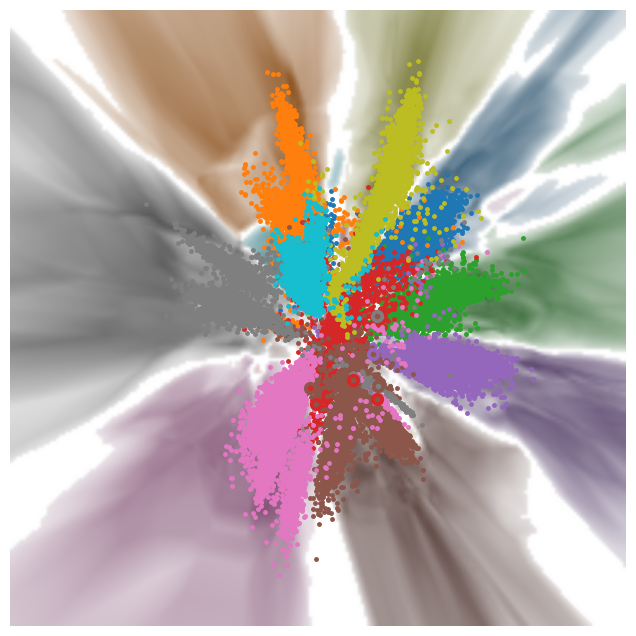

In [11]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from representationTrans.trans_visualizer_border import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, R_n.detach().numpy(),I, np.dot(tar_train_data,S_n.detach().numpy()), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 8121.13it/s]


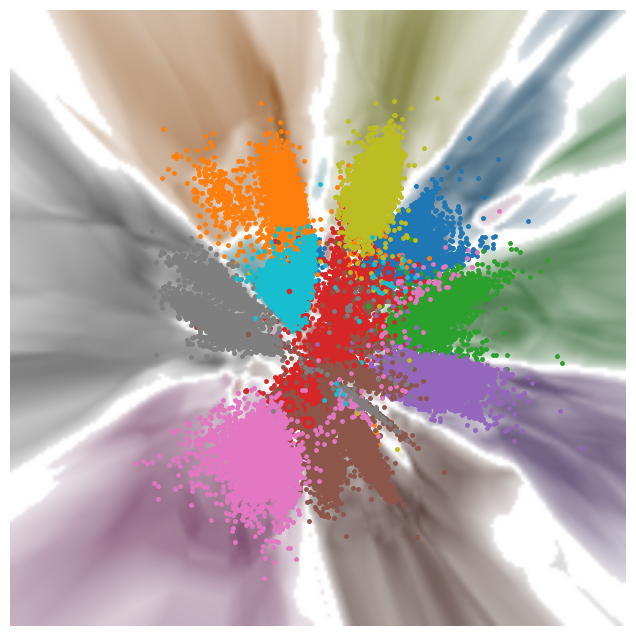

In [12]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from representationTrans.trans_visualizer_border import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(ref_provider, I,I, ref_train_data, projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

In [30]:
from AlignVis.AlignMetrixGenerator import TrainingSnapshotAlignment
alignment_n = TrainingSnapshotAlignment(ref_provider, tar_provider,ref_EPOCH=REF_EPOCH,tar_EPOCH=TAR_EPOCH, projector=projector, visualizer=vis)
R_n_2 = alignment_n.align_embeddings_batch(Y,X,train_steps=4000,CKA_LAMBDA=100,CKA_LAMBAD_FOR_INIT=1e-3,N_LAMBDA=100)

batch_idx 0,iteration 0, loss1 65502392.0 loss2 {tensor(0.7834, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.8510, requires_grad=True)}
batch_idx 199,iteration 199, loss1 592.7222900390625 loss2 {tensor(0.5366, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4920, requires_grad=True)}
batch_idx 398,iteration 398, loss1 236.24374389648438 loss2 {tensor(0.3439, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4660, requires_grad=True)}
batch_idx 97,iteration 597, loss1 216.66461181640625 loss2 {tensor(0.3112, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4190, requires_grad=True)}
batch_idx 296,iteration 796, loss1 228.19483947753906 loss2 {tensor(0.3359, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4140, requires_grad=True)}
batch_idx 495,iteration 995, loss1 205.9328155517578 loss2 {tensor(0.2813, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.3770, requires_grad=True)}
batch_idx 194,iteration 1194, loss1 191.8606414794922 loss2 {tensor(0.2756, grad_fn=<AddBackward0>)} neibour_

KeyboardInterrupt: 

Computing decision regions ...


100%|██████████| 200/200 [00:00<00:00, 8239.55it/s]
../AlignVis/visualizerwr.py:188: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_data = self.data_provider.train_representation(epoch)[self.indicates]
../AlignVis/visualizerwr.py:189: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_labels = self.data_provider.train_labels(epoch)[self.indicates]
../AlignVis/visualizerwr.py:190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will

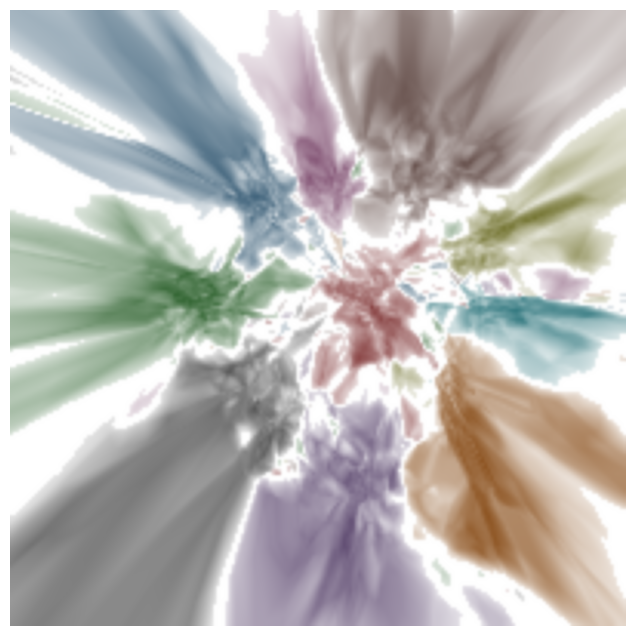

In [38]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from AlignVis.visualizerwr import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(ref_provider,tar_provider,R_n.detach().numpy(), np.dot(tar_train_data,I), projector, 200,[[]],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

Computing decision regions ...


100%|██████████| 200/200 [00:00<00:00, 9384.70it/s]
../representationTrans/trans_visualizer_border.py:186: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_data = self.data_provider.train_representation(epoch)[self.indicates]
../representationTrans/trans_visualizer_border.py:187: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_labels = self.data_provider.train_labels(epoch)[self.indicates]
../representationTrans/trans_visualizer_border.py:188: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; us

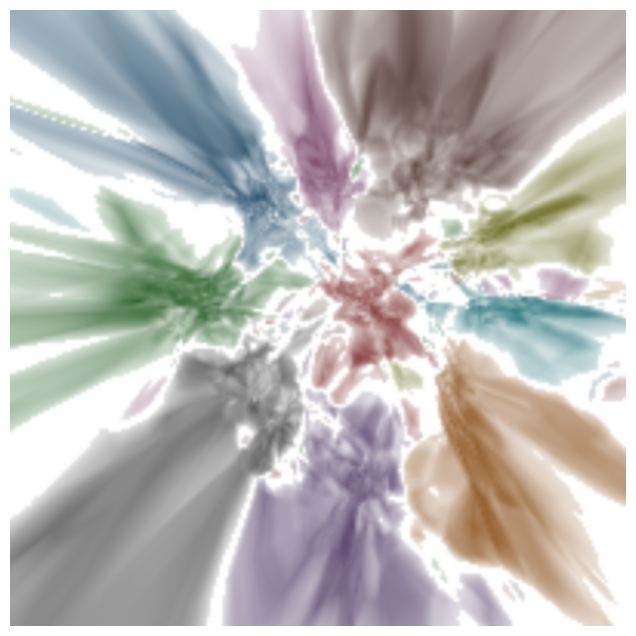

In [37]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from representationTrans.trans_visualizer_border import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(ref_provider,I,I, ref_train_data, projector, 200,[[]],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 8664.06it/s]


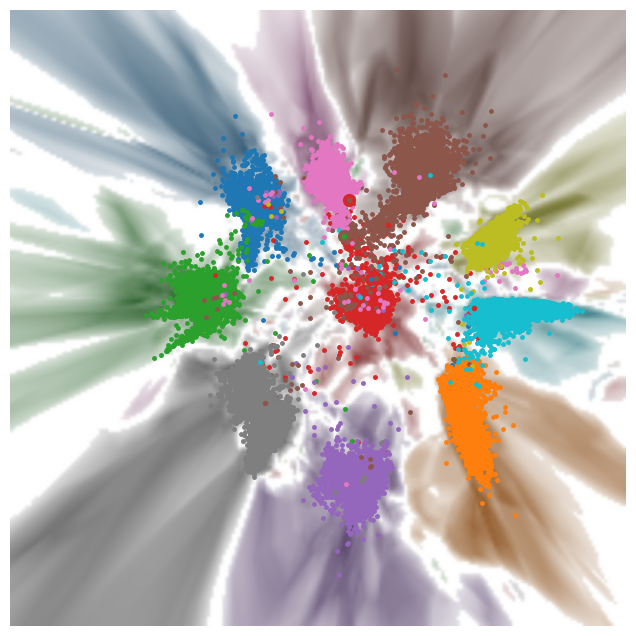

In [10]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from representationTrans.trans_visualizer_border import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(ref_provider, I,I, ref_train_data, projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 6037.51it/s]


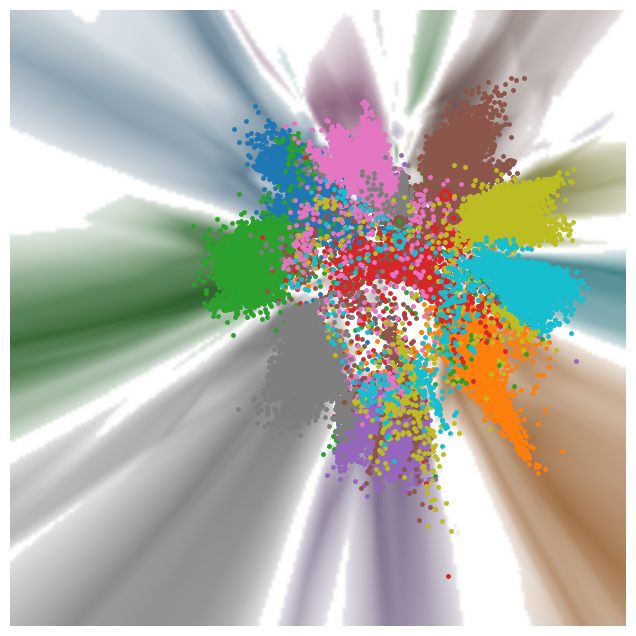

In [80]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=CLEAN_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from representationTrans.trans_visualizer_border import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(ref_provider, R_n.detach().numpy(),I, np.dot(ref_train_data,S_n.detach().numpy()), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))